In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import cv2
import pandas as pd

In [3]:
#datasets = {16: 'data/IT4/MSEAndContrastive20Meter'}
datasets = {16: 'data/IT5/MSEAndContrastive400', 
            23: 'data/IT6/LocalCorrelationNet_3Cities'}
    

NO = 23
MODE = 'Train'
#MODE = 'Test'

q_df = pd.read_csv(f'{datasets[16]}/{MODE}/images/zurich/query/postprocessed.csv')
db_df = pd.read_csv(f'{datasets[16]}/{MODE}/images/zurich/database/postprocessed.csv')

with open(f'{datasets[16]}/{MODE}/pictures.csv', "r") as f:
    pics = f.readlines()

for i in range(1, len(pics)):
    pics[i] = pics[i].split(',')
    
gps = np.genfromtxt(f'{datasets[NO]}/{MODE}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[NO]}/{MODE}/embedding.csv', delimiter=',')
emb = emb

# filter away negatives
for i in range(len(gps)):
    emb[i][gps[i] > 25] = 1
    gps[i][gps[i] > 25] = 0

Text(0.5, 1.0, 'Point: 1288')

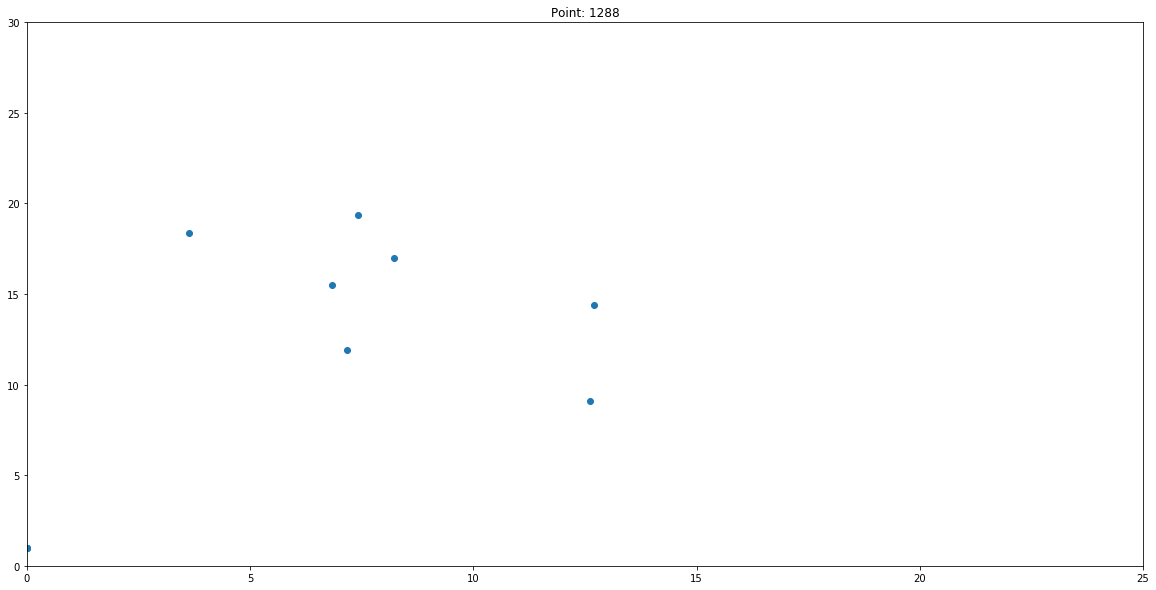

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

plt.scatter(gps[seed], emb[seed])
plt.xlim((0,25))
plt.ylim((0,30))
plt.title(f'Point: {seed}')

In [31]:
1288 
gps[seed]


array([ 3.62836599,  6.82603312,  7.17226648,  7.41224718,  8.21678925,
       12.61761093, 12.70964813,  0.        ,  0.        ,  0.        ])

In [32]:
def get_utm_points(points, no_points):
    utm_points = []
    for i in range(no_points + 1):
        if i == 0:
            p = q_df.loc[q_df['key'] == points[i]].values[0][2:4]
        else:
            p = db_df.loc[db_df['key'] == points[i][-26:-4]].values[0][2:4]
            
        utm_points.append(p)
    return np.array(utm_points)

[[463982.6281830398 5245478.752704906]
 [463986.22038411 5245479.619804408]
 [463988.16666145506 5245482.997573307]
 [463984.1833151944 5245486.0782415215]
 [463986.1963169568 5245485.554682582]
 [463989.4956318949 5245474.354069031]
 [463984.3457124842 5245491.634111103]
 [463986.8115712366 5245491.074437853]]


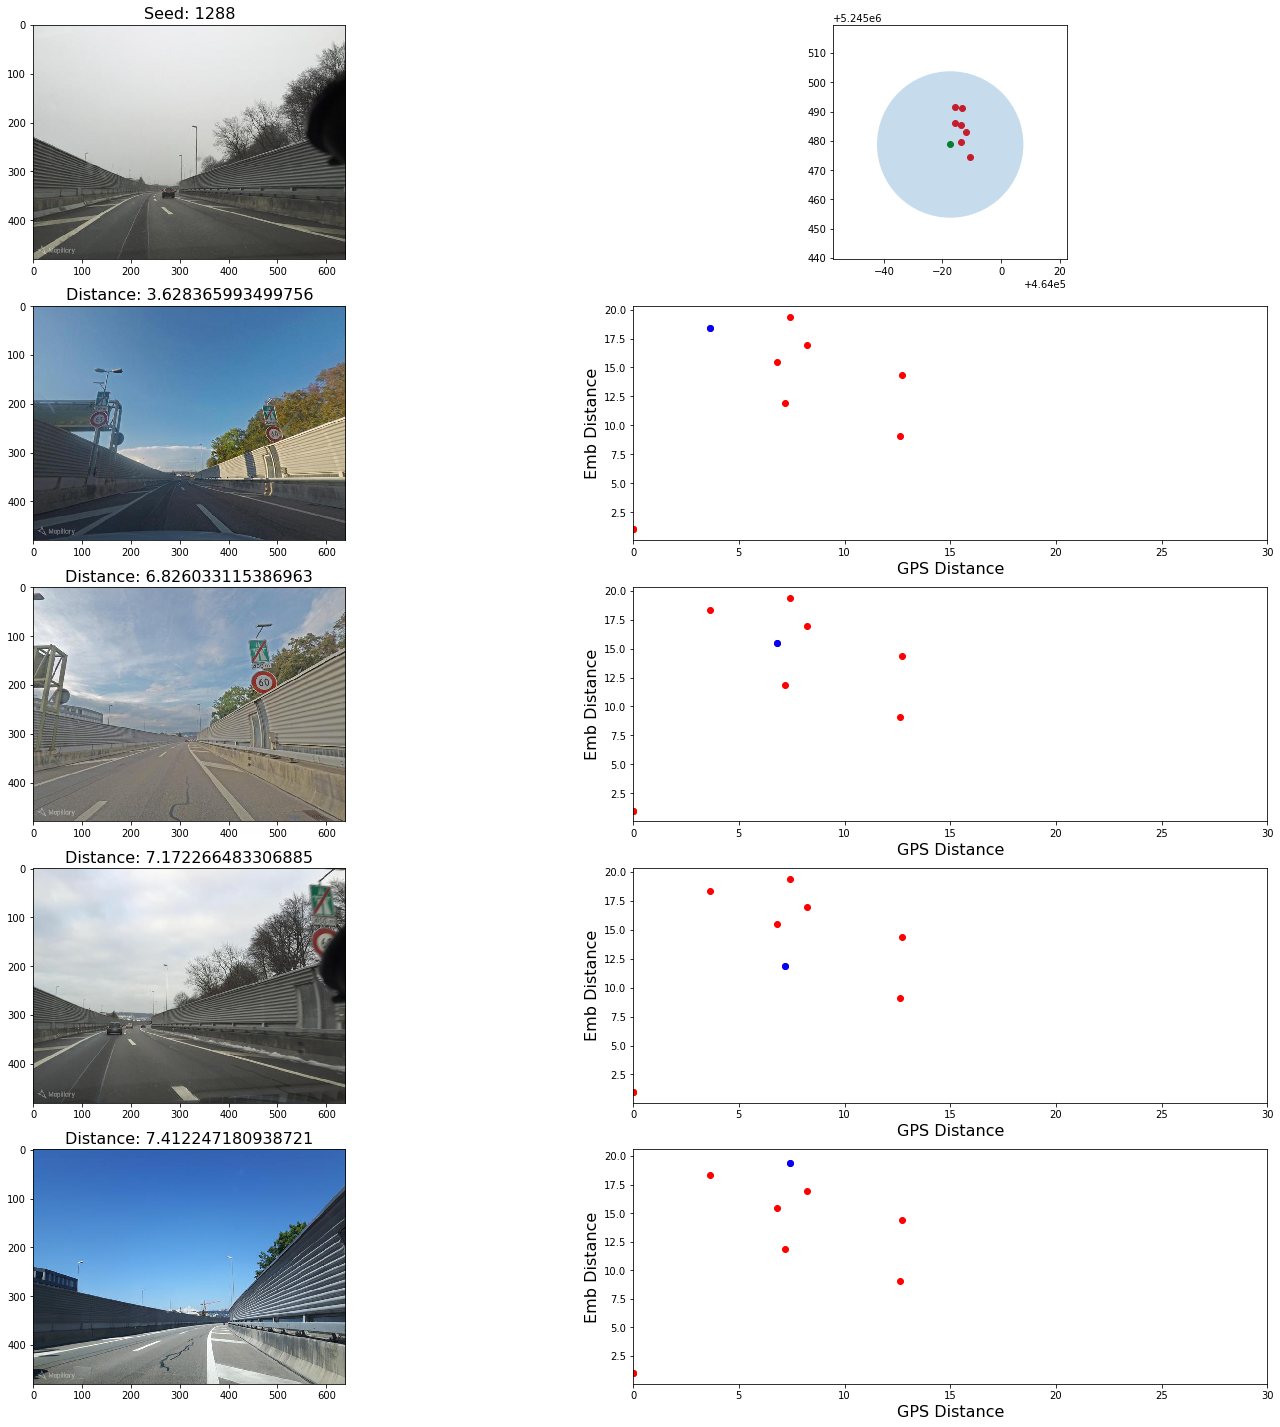

In [33]:
# 1558, 303, 529, 543
seed = 1288 #random.randint(1,len(gps)-4)
MAX_PLOTS = 5

filtered_gps = gps[seed][gps[seed] != 0]
fig, axs = plt.subplots(min(MAX_PLOTS, len(filtered_gps)+1), 2, figsize=(25,25))

for i, point in enumerate(gps[seed]):
    if i > 0:
        if gps[seed][i-1] == 0.0:
            break
        if i >= MAX_PLOTS:
            break
    
    if i == 0:
        filename = pics[seed][i]
        #file_path = f'{datasets[NO]}/{MODE}/images/zurich/query/images/{filename}.jpg'
        file_path = f'{datasets[16]}/{MODE}/images/zurich/query/images/{filename}.jpg'
    else:
        filename = pics[seed][i][-26:]
        #file_path = f'{datasets[NO]}/{MODE}/images/zurich/database/images/{filename}'
        file_path = f'{datasets[16]}/{MODE}/images/zurich/database/images/{filename}'

        
    img = plt.imread(file_path, format=None)
    axs[i,0].imshow(img)
    if i == 0:
        axs[i,0].set_title(f'Seed: {seed}', fontsize=16)
        no_points = len(gps[seed][gps[seed] != 0])
        utm_points = get_utm_points(pics[seed], no_points)
        print(utm_points)
        draw_circle = plt.Circle((utm_points[0,0], utm_points[0,1]), 25, alpha=0.25)

        axs[i,1].add_artist(draw_circle)
        axs[i,1].set_aspect(1)
        axs[i,1].scatter(utm_points[1:,0], utm_points[1:,1], color='r')
        axs[i,1].scatter(utm_points[0,0], utm_points[0,1], color='g')
        axs[i,1].set_xlim([utm_points[0,0] - 40, utm_points[0,0] + 40])
        axs[i,1].set_ylim([utm_points[1,1] - 40, utm_points[1,1] + 40])
    else:
        axs[i,0].set_title(f'Distance: {gps[seed][i-1]}', fontsize=16)
        axs[i,1].scatter(gps[seed], emb[seed], color='r')
        axs[i,1].scatter(gps[seed][i-1], emb[seed][i-1], color='b')
        axs[i,1].set_xlim([0, 30])
#        axs[i,1].set_ylim([0, 0.3])
        axs[i,1].set_xlabel('GPS Distance', fontsize=16)
        axs[i,1].set_ylabel('Emb Distance', fontsize=16)